In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import files
uploaded = files.upload()

Saving statessay.csv to statessay.csv


In [4]:
df = pd.read_csv("statessay.csv")

In [5]:
df.head()

,Country,GDP per capita/$,average BMI,average female BMI,average male BMI,average life expectancy,average female life expectancy,average male life expectancy
0,Australia,48197,27.30,26.87,27.72,82.97,84.99,80.95
1,Afghanistan,2057,23.46,24.23,22.68,63.81,65.28,62.34
2,Belguim,49829,26.28,25.75,26.80,81.11,83.49,78.72
3,Belize,7207,29.19,30.75,27.63,74.35,77.20,71.50
4,Bhutan,10775,24.08,24.57,23.59,70.78,71.06,70.50


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         50 non-null     object 
 1   GDP per capita/$                50 non-null     int64  
 2   average BMI                     50 non-null     float64
 3   average female BMI              50 non-null     float64
 4   average male BMI                50 non-null     float64
 5   average life expectancy         50 non-null     float64
 6   average female life expectancy  50 non-null     float64
 7   average male life expectancy    50 non-null     float64
dtypes: float64(6), int64(1), object(1)
memory usage: 3.2+ KB


In [7]:
df.isnull().sum()

Country                           0
GDP per capita/$                  0
average BMI                       0
average female BMI                0
average male BMI                  0
average life expectancy           0
average female life expectancy    0
average male life expectancy      0
dtype: int64

In [8]:
df.describe()

,GDP per capita/$,average BMI,average female BMI,average male BMI,average life expectancy,average female life expectancy,average male life expectancy
count,50.000000,50.000000,50.00000,50.00000,50.000000,50.000000,50.000000
mean,28459.200000,25.674600,25.87720,25.46540,73.823600,75.965000,71.678200
std,25197.379026,2.315167,2.49027,2.38499,9.168416,9.462133,8.973969
min,880.000000,20.620000,21.12000,20.11000,52.140000,54.860000,48.970000
25%,4639.000000,23.947500,24.25000,23.56750,65.652500,67.737500,63.820000
50%,25011.000000,25.775000,25.88000,26.03000,76.640000,79.195000,73.945000
75%,47145.250000,27.297500,27.14750,27.47250,81.820000,83.940000,79.240000
max,95602.000000,32.370000,34.01000,30.72000,84.300000,87.200000,81.390000


In [9]:
df.columns

Index(['Country', 'GDP per capita/$', 'average BMI', 'average female BMI',
       'average male BMI', 'average life expectancy',
       'average female life expectancy', 'average male life expectancy'],
      dtype='object')

In [10]:
corr_score = df[['Country', 'GDP per capita/$', 'average BMI', 'average female BMI',
       'average male BMI', 'average life expectancy',
       'average female life expectancy', 'average male life expectancy']].corr()

In [11]:
corr_score

,GDP per capita/$,average BMI,average female BMI,average male BMI,average life expectancy,average female life expectancy,average male life expectancy
GDP per capita/$,1.000000,0.388962,0.176298,0.571353,0.781719,0.761451,0.794468
average BMI,0.388962,1.000000,0.951969,0.947451,0.460276,0.463892,0.451515
average female BMI,0.176298,0.951969,1.000000,0.803994,0.213863,0.220073,0.205089
average male BMI,0.571353,0.947451,0.803994,1.000000,0.670483,0.671027,0.662627
average life expectancy,0.781719,0.460276,0.213863,0.670483,1.000000,0.994915,0.994343
average female life expectancy,0.761451,0.463892,0.220073,0.671027,0.994915,1.000000,0.978587
average male life expectancy,0.794468,0.451515,0.205089,0.662627,0.994343,0.978587,1.000000


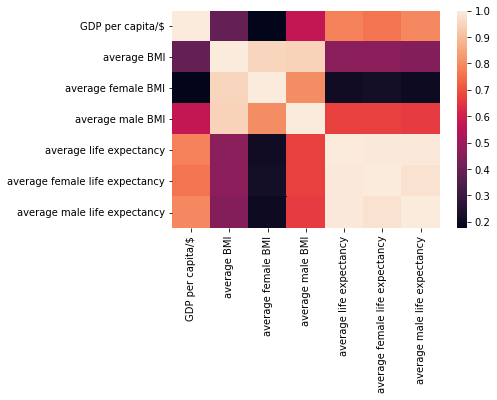

In [12]:
sns.heatmap(corr_score)

In [13]:
df.columns

Index(['Country', 'GDP per capita/$', 'average BMI', 'average female BMI',
       'average male BMI', 'average life expectancy',
       'average female life expectancy', 'average male life expectancy'],
      dtype='object')

In [14]:
model_life_BMI = smf.ols(formula='Q("average life expectancy") ~ Q("average BMI")', data=df).fit()
print(model_life_BMI.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Q("average life expectancy")   R-squared:                       0.212
Model:                                      OLS   Adj. R-squared:                  0.195
Method:                           Least Squares   F-statistic:                     12.90
Date:                          Thu, 06 Jan 2022   Prob (F-statistic):           0.000770
Time:                                  18:50:07   Log-Likelihood:                -175.28
No. Observations:                            50   AIC:                             354.6
Df Residuals:                                48   BIC:                             358.4
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [15]:
model_flife_fBMI = smf.ols(formula='Q("average female life expectancy") ~ Q("average female BMI")', data=df).fit()
print(model_flife_fBMI.summary())

                                     OLS Regression Results                                    
Dep. Variable:     Q("average female life expectancy")   R-squared:                       0.048
Model:                                             OLS   Adj. R-squared:                  0.029
Method:                                  Least Squares   F-statistic:                     2.443
Date:                                 Thu, 06 Jan 2022   Prob (F-statistic):              0.125
Time:                                         18:50:32   Log-Likelihood:                -181.57
No. Observations:                                   50   AIC:                             367.1
Df Residuals:                                       48   BIC:                             371.0
Df Model:                                            1                                         
Covariance Type:                             nonrobust                                         
                              coef    st

In [16]:
model_mlife_mBMI = smf.ols(formula='Q("average male life expectancy") ~ Q("average male BMI")', data=df).fit()
print(model_mlife_mBMI.summary())

                                    OLS Regression Results                                   
Dep. Variable:     Q("average male life expectancy")   R-squared:                       0.439
Model:                                           OLS   Adj. R-squared:                  0.427
Method:                                Least Squares   F-statistic:                     37.57
Date:                               Thu, 06 Jan 2022   Prob (F-statistic):           1.59e-07
Time:                                       18:50:32   Log-Likelihood:                -165.70
No. Observations:                                 50   AIC:                             335.4
Df Residuals:                                     48   BIC:                             339.2
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
                            coef    std err          t      

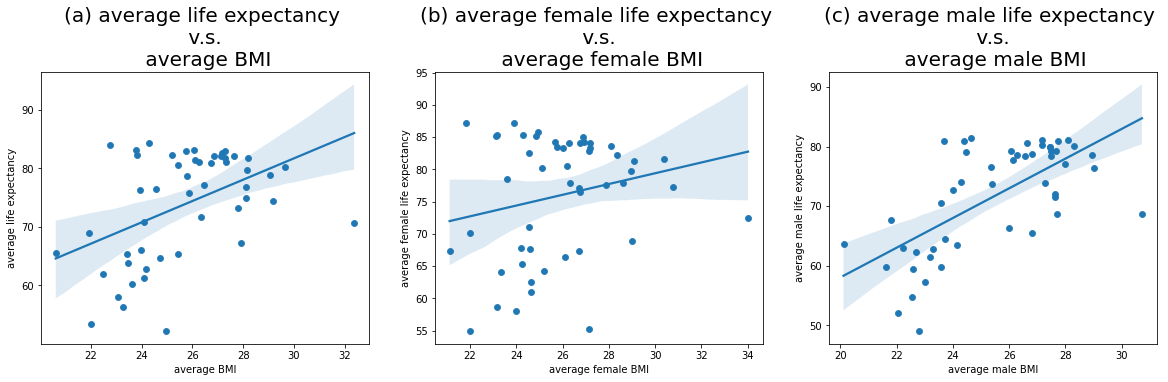

In [17]:
# boxplot for numerical feature
_,axss = plt.subplots(1,3, figsize=[20,5])
sns.scatterplot(x='average BMI', y ='average life expectancy', data=df, ax=axss[0]).set_title("(a) average life expectancy \n v.s. \n average BMI",fontsize=20)
sns.regplot(x='average BMI', y ='average life expectancy', data=df, ax=axss[0])
sns.scatterplot(x='average female BMI', y ='average female life expectancy', data=df, ax=axss[1]).set_title("(b) average female life expectancy \n v.s. \n average female BMI",fontsize=20)
sns.regplot(x='average female BMI', y ='average female life expectancy', data=df, ax=axss[1])
sns.scatterplot(x='average male BMI', y ='average male life expectancy', data=df, ax=axss[2]).set_title("(c) average male life expectancy \n v.s. \n average male BMI",fontsize=20)
sns.regplot(x='average male BMI', y ='average male life expectancy', data = df, ax=axss[2])

In [18]:
from scipy.optimize import curve_fit
def expfunc(x,a,b,c,d):
  return a * np.exp( b * x + c) + d
x = np.linspace(0,100000,200)

In [20]:
popt1, pcov1 = curve_fit(lambda t,a,b,c,d: a * np.exp(b * t+c) + d, \
                       df['GDP per capita/$'].values, df['average life expectancy'].values, p0=(-50, -0.0002, 0, 80))
df2_1 = pd.DataFrame({"x":x, "y":expfunc(x,*popt1)})

popt2, pcov2 = curve_fit(lambda t,a,b,c,d: a * np.exp(b * t+c) + d, \
                       df['GDP per capita/$'].values, df['average female life expectancy'].values, p0=(-50, -0.0002, 0, 80))
df2_2 = pd.DataFrame({"x":x, "y":expfunc(x,*popt2)})

popt3, pcov3 = curve_fit(lambda t,a,b,c,d: a * np.exp(b * t+c) + d, \
                       df['GDP per capita/$'].values, df['average male life expectancy'].values, p0=(-50, -0.0002, 0, 80))
df2_3 = pd.DataFrame({"x":x, "y":expfunc(x,*popt3)})



In [21]:
print(popt1)
print(popt2)
print(popt3)

[-3.12160221e+01 -7.52971174e-05 -2.72245521e-01  8.19741651e+01]
[-2.34968344e+02 -8.61184189e-05 -2.24827346e+00  8.39079807e+01]
[-3.88630846e+01 -6.39804592e-05 -5.26913858e-01  8.02196509e+01]


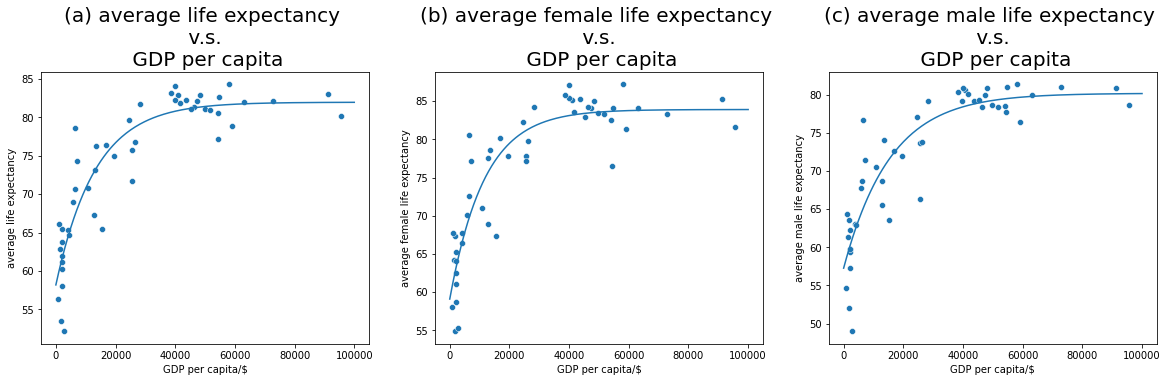

In [22]:
# boxplot for numerical feature
_,axss = plt.subplots(1,3, figsize=[20,5])
sns.scatterplot(x='GDP per capita/$', y ='average life expectancy', data=df, ax=axss[0]).set_title("(a) average life expectancy \n v.s. \n GDP per capita",fontsize=20)
sns.scatterplot(x='GDP per capita/$', y ='average female life expectancy', data=df, ax=axss[1]).set_title("(b) average female life expectancy \n v.s. \n GDP per capita",fontsize=20)
sns.scatterplot(x='GDP per capita/$', y ='average male life expectancy', data=df, ax=axss[2]).set_title("(c) average male life expectancy \n v.s. \n GDP per capita",fontsize=20)
sns.lineplot(x='x',y='y', data=df2_1, ax = axss[0])
sns.lineplot(x='x',y='y', data=df2_2, ax = axss[1])
sns.lineplot(x='x',y='y', data=df2_3, ax = axss[2])


In [23]:
model_BMI_GDP = smf.ols(formula='Q("average BMI") ~ Q("GDP per capita/$")', data=df).fit()
print(model_BMI_GDP.summary())

                            OLS Regression Results                            
Dep. Variable:       Q("average BMI")   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     8.557
Date:                Thu, 06 Jan 2022   Prob (F-statistic):            0.00524
Time:                        18:51:11   Log-Likelihood:                -108.31
No. Observations:                  50   AIC:                             220.6
Df Residuals:                      48   BIC:                             224.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                24.65

In [28]:
model_fBMI_GDP = smf.ols(formula='Q("average female BMI") ~ Q("GDP per capita/$")', data=df).fit()
print(model_fBMI_GDP.summary())

                               OLS Regression Results                              
Dep. Variable:     Q("average female BMI")   R-squared:                       0.031
Model:                                 OLS   Adj. R-squared:                  0.011
Method:                      Least Squares   F-statistic:                     1.540
Date:                     Thu, 06 Jan 2022   Prob (F-statistic):              0.221
Time:                             18:52:01   Log-Likelihood:                -115.27
No. Observations:                       50   AIC:                             234.5
Df Residuals:                           48   BIC:                             238.4
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [29]:
model_mBMI_GDP = smf.ols(formula='Q("average male BMI") ~ Q("GDP per capita/$")', data=df).fit()
print(model_mBMI_GDP.summary())

                              OLS Regression Results                             
Dep. Variable:     Q("average male BMI")   R-squared:                       0.326
Model:                               OLS   Adj. R-squared:                  0.312
Method:                    Least Squares   F-statistic:                     23.26
Date:                   Thu, 06 Jan 2022   Prob (F-statistic):           1.47e-05
Time:                           18:52:21   Log-Likelihood:                -104.02
No. Observations:                     50   AIC:                             212.0
Df Residuals:                         48   BIC:                             215.9
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


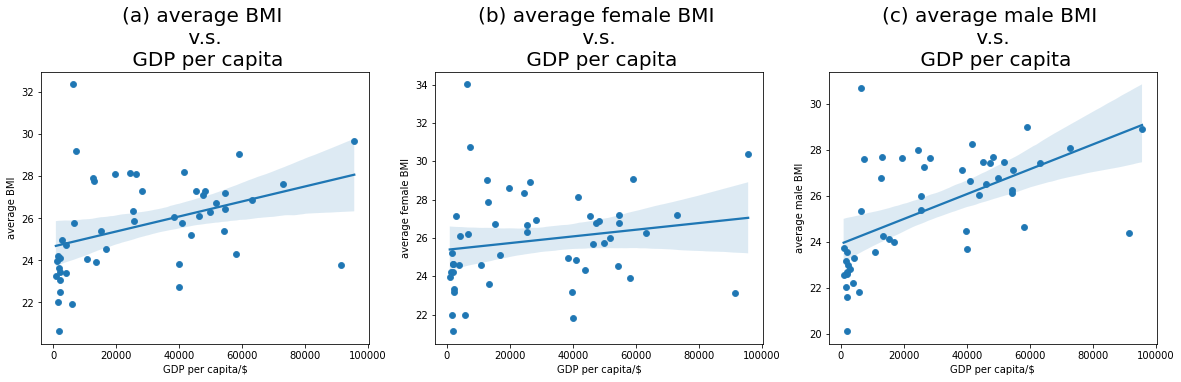

In [25]:
# boxplot for numerical feature
_,axss = plt.subplots(1,3, figsize=[20,5])
sns.scatterplot(x='GDP per capita/$', y ='average BMI', data=df, ax=axss[0]).set_title("(a) average BMI \n v.s. \n GDP per capita",fontsize=20)
sns.regplot(x='GDP per capita/$', y ='average BMI', data=df, ax=axss[0])
sns.scatterplot(x='GDP per capita/$', y ='average female BMI', data=df, ax=axss[1]).set_title("(b) average female BMI \n v.s. \n GDP per capita",fontsize=20)
sns.regplot(x='GDP per capita/$', y ='average female BMI', data=df, ax=axss[1])
sns.scatterplot(x='GDP per capita/$', y ='average male BMI', data=df, ax=axss[2]).set_title("(c) average male BMI \n v.s. \n GDP per capita",fontsize=20)
sns.regplot(x='GDP per capita/$', y ='average male BMI', data=df, ax=axss[2])

In [31]:
model_life_BMI_GDP = smf.ols(formula='Q("average life expectancy") ~ Q("average BMI") + Q("GDP per capita/$")', data=df).fit()
print(model_life_BMI_GDP.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Q("average life expectancy")   R-squared:                       0.640
Model:                                      OLS   Adj. R-squared:                  0.625
Method:                           Least Squares   F-statistic:                     41.75
Date:                          Thu, 06 Jan 2022   Prob (F-statistic):           3.78e-11
Time:                                  19:14:29   Log-Likelihood:                -155.70
No. Observations:                            50   AIC:                             317.4
Df Residuals:                                47   BIC:                             323.1
Df Model:                                     2                                         
Covariance Type:                      nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [33]:
model_flife_fBMI_GDP = smf.ols(formula='Q("average female life expectancy") ~ Q("average female BMI") + Q("GDP per capita/$")', data=df).fit()
print(model_flife_fBMI_GDP.summary())

                                     OLS Regression Results                                    
Dep. Variable:     Q("average female life expectancy")   R-squared:                       0.587
Model:                                             OLS   Adj. R-squared:                  0.570
Method:                                  Least Squares   F-statistic:                     33.46
Date:                                 Thu, 06 Jan 2022   Prob (F-statistic):           9.22e-10
Time:                                         19:15:41   Log-Likelihood:                -160.67
No. Observations:                                   50   AIC:                             327.3
Df Residuals:                                       47   BIC:                             333.1
Df Model:                                            2                                         
Covariance Type:                             nonrobust                                         
                              coef    st

In [34]:
model_mlife_mBMI_GDP = smf.ols(formula='Q("average male life expectancy") ~ Q("average male BMI") + Q("GDP per capita/$")', data=df).fit()
print(model_mlife_mBMI_GDP.summary())

                                    OLS Regression Results                                   
Dep. Variable:     Q("average male life expectancy")   R-squared:                       0.696
Model:                                           OLS   Adj. R-squared:                  0.683
Method:                                Least Squares   F-statistic:                     53.76
Date:                               Thu, 06 Jan 2022   Prob (F-statistic):           7.12e-13
Time:                                       19:16:23   Log-Likelihood:                -150.40
No. Observations:                                 50   AIC:                             306.8
Df Residuals:                                     47   BIC:                             312.5
Df Model:                                          2                                         
Covariance Type:                           nonrobust                                         
                            coef    std err          t      